In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
import collections
import lmfit as lm

mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 8})

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'mathtext.default':  'regular' })
%matplotlib notebook
%matplotlib notebook

In [2]:
SP = 0.44;
RefSP = 5000;  # Reference spin polarization from saturated 855.6 nm echo.

## Pi and 0-pi data combined from two sweeps. (in the end of the first sweep field was unstable)
data00 = sio.loadmat('1_Si29_TiSSW_TwoColorESR_820_875_va24_LF_CTL946p7_4s_100ms_5mWat850');
data11 = sio.loadmat('2_Si29_TiSSW_TwoColorESR_865_875_va24_LF_CTL946p7_4s_100ms_5mWat850');

wax = np.concatenate((data00['Lact'][0][0:449], data11['Lact'][0][1:-1]),axis = None)
data0 = np.concatenate((data00['signalIrefnoBg'][0][0:449], data11['signalIrefnoBg'][0][1:-1]),axis = None)/RefSP * SP
data1 = np.concatenate((data00['signalInoBg'][0][0:449], data11['signalInoBg'][0][1:-1]),axis = None)/RefSP * SP
## Reference data 
dataComp = sio.loadmat('6_3pecho_TiSapp_TwoColor_07deg_Si29_820_875_va24_LF_946p7_6s_100ms_OD04_12mWat880_ref2pecho_10K_refSpectrafrom0812')



TwoColorData = collections.defaultdict(dict)

TwoColorData['TwoColor']['Wavelength'] = wax
TwoColorData['TwoColor']['SpinPolPi'] = data1
TwoColorData['TwoColor']['SpinPol'] = data0
TwoColorData['RefSweep']['SpinPol'] = dataComp['signalInoBg'][0]/RefSP*0.44
TwoColorData['RefSweep']['Wavelength'] = dataComp['Lact'][0]

#Baseline Spin Pol for different Initialization
SP0 = np.mean(TwoColorData['TwoColor']['SpinPol'][-10:-1]); 
SP1 = np.mean(TwoColorData['TwoColor']['SpinPolPi'][-10:-1]);
# Initial Population 
P0 = (1+2*SP0)/3
P1 = (1-SP0)/3

S0 = TwoColorData['TwoColor']['SpinPol'] - SP0
S1 = TwoColorData['TwoColor']['SpinPolPi'] - SP1
## Decomposed spin polarization
TwoColorData['Decompose']['ms0'] = (P0*S0 - P1 *S1)/(P0**2 - P1**2)
TwoColorData['Decompose']['ms1'] = (P0*S1 - P1 *S0)/(P0**2 - P1**2)
TwoColorData['Decompose']['Reconstruct'] = TwoColorData['Decompose']['ms0'] + TwoColorData['Decompose']['ms1']
TwoColorData['Decompose']['Wavelength'] = TwoColorData['TwoColor']['Wavelength']

PLEData = sio.loadmat('RydbergPLEData.mat')
sio.savemat('ESRSpectra.mat',TwoColorData)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


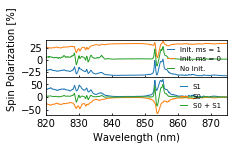

In [3]:
mm = 1/25.4

fig,ax = plt.subplots(2,1,sharex = True,figsize=(86*mm, 86*mm/1.618))
ax[0].tick_params(direction='in',length = 2)
ax[1].tick_params(direction='in',length = 2)
ax[0].plot(TwoColorData['TwoColor']['Wavelength'],TwoColorData['TwoColor']['SpinPolPi']*100,linewidth = 1)
ax[0].plot(TwoColorData['TwoColor']['Wavelength'],TwoColorData['TwoColor']['SpinPol']*100,linewidth = 1)
ax[0].plot(TwoColorData['RefSweep']['Wavelength'],TwoColorData['RefSweep']['SpinPol']*100,linewidth = 1)
#ax.set_xlabel("Wavelength (nm)")
ax[0].set_ylabel("Spin Polarization [%]")
#ax[0].set_xlabel("Wavelength (nm)")
ax[0].set_yscale('linear')
ax[0].set_xlim([820,875])
ax[0].legend(('Init. ms = 1','Init. ms = 0','No Init.'),framealpha=0,handlelength = 1,fontsize = 7)


ax[1].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['ms1']*100,linewidth = 1)
ax[1].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['ms0']*100,linewidth = 1)
ax[1].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['Reconstruct']*100,linewidth = 1)
ax[1].set_xlim([820,875])
ax[1].set_xlabel("Wavelength (nm)")
#ax[1].set_ylabel("Spin Polarization [%]")
ax[1].set_yscale('linear')
ax[1].legend(('S1','S0','S0 + S1'),framealpha=0,handlelength = 1,fontsize = 7)

fig.align_ylabels(ax)

plt.tight_layout()
fig = plt.gcf()
fig.subplots_adjust(hspace = 0)
plt.show()
fig.savefig('fig2a.pdf', format='pdf')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


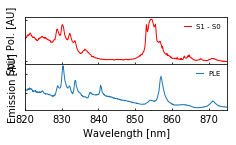

In [4]:
mm = 1/25.4

fig,ax = plt.subplots(2,1,sharex = True,figsize=(86*mm, 86*mm/1.618))
#ax[0].axis('off')
#ax[1].axis('off')
#ax[2].axis('off')
#ax[3].axis('off')
ax[0].tick_params(direction='in',length = 2)
ax[1].tick_params(direction='in',length = 2)


#ax[2].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['ms1']*100,linewidth = 1)
#ax[2].plot(TwoColorData['Decompose']['Wavelength'],-TwoColorData['Decompose']['ms0']*100,linewidth = 1)
ax[0].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['ms1']*100-TwoColorData['Decompose']['ms0']*100,color ='r',linewidth = 1)
#ax[0].plot(PLEData['OH'][0,0]['ExcitationAxis'][0],PLEData['OH'][0,0]['Spectra'][:,405]/200,linewidth = 1)
ax[0].set_xlim([820,875])
#ax[2].set_xlabel("Wavelength (nm)")
ax[0].set_ylabel("Spin Pol. [AU]")
ax[0].yaxis.set_ticklabels([])
#ax[0].set_yscale('linear')
ax[0].legend(["S1 - S0"],framealpha=0,handlelength = 1,fontsize = 7)

ax[1].plot(PLEData['OH'][0,0]['ExcitationAxis'][0],PLEData['OH'][0,0]['Spectra'][:,405],linewidth = 1)
ax[1].set_xlim([820,875])
ax[1].yaxis.set_ticklabels([])
ax[1].set_ylabel('Emission [AU]')
ax[1].set_xlabel("Wavelength [nm]")
ax[1].legend(["PLE"],framealpha=0,handlelength = 1,fontsize = 7)
fig.align_ylabels(ax)

plt.tight_layout()
fig = plt.gcf()
fig.subplots_adjust(hspace = 0)
plt.show()
fig.savefig('fig2b.pdf', format='pdf')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


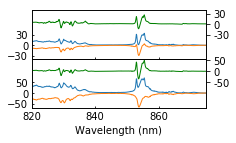

In [5]:
mm = 1/25.4

fig,ax = plt.subplots(2,1,sharex = True,figsize=(86*mm, 86*mm/1.618))
ax[0].tick_params(direction='in',length = 2)
ax[1].tick_params(direction='in',length = 2)
ax2 = ax[0].twinx() 
ax3 = ax[1].twinx()
ax[0].plot(TwoColorData['TwoColor']['Wavelength'],TwoColorData['TwoColor']['SpinPolPi']*100 - np.mean(TwoColorData['TwoColor']['SpinPolPi'][-10:-1]*100),linewidth = 1)
ax[0].plot(TwoColorData['TwoColor']['Wavelength'],TwoColorData['TwoColor']['SpinPol']*100-np.mean(TwoColorData['TwoColor']['SpinPol'][-10:-1]*100),linewidth = 1)
ax2.plot(TwoColorData['RefSweep']['Wavelength'],TwoColorData['RefSweep']['SpinPol']*100 + 60,color = 'g',linewidth = 1)
#ax.set_xlabel("Wavelength (nm)")
#ax[0].set_ylabel("Spin Polarization [%]")
#ax[0].set_xlabel("Wavelength (nm)")
ax[0].set_yscale('linear')
ax[0].set_xlim([820,875])
ax2.set_ylim([-40,100])
ax[0].set_ylim([-40,100])
ax[0].set_yticks([-30,0,30])
ax2.set_yticks([30,60,90])
ax2.set_yticklabels([-30,0,30])
#ax[0].legend(('Init. ms = 1','Init. ms = 0','No Init.'),framealpha=0,handlelength = 1,fontsize = 7)
#ax2.legend(('No Init.'),framealpha=0,handlelength = 1,fontsize = 7)

ax[1].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['ms1']*100,linewidth = 1)
ax[1].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['ms0']*100,linewidth = 1)
ax3.plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['Reconstruct']*100+100,color = 'g',linewidth = 1)
ax[1].set_xlim([820,875])
ax[1].set_xlabel("Wavelength (nm)")
ax[1].set_yscale('linear')
#ax[1].set_ylabel("Spin Polarization [%]")
ax[1].set_ylim([-70,155])
ax[1].set_yticks([-50,0,50])
#ax[1].set_yticklabels([-50,0,50])
ax3.set_ylim([-70,155])
ax3.set_yticks([50,100,150])
ax3.set_yticklabels([-50,0,50])

#ax[1].legend(('I1','I0','I0 + I1'),framealpha=0,handlelength = 1,fontsize = 7)

fig.align_ylabels(ax)

plt.tight_layout()
fig = plt.gcf()
fig.subplots_adjust(hspace = 0)
plt.show()
#fig.savefig('fig2aoffset.pdf', format='pdf')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


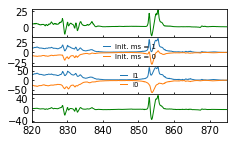

In [6]:
mm = 1/25.4

fig,ax = plt.subplots(4,1,sharex = True,figsize=(86*mm, 86*mm/1.618))
ax[0].tick_params(direction='in',length = 2)
ax[1].tick_params(direction='in',length = 2)
ax[2].tick_params(direction='in',length = 2)
ax[3].tick_params(direction='in',length = 2)
ax[0].plot(TwoColorData['RefSweep']['Wavelength'],TwoColorData['RefSweep']['SpinPol']*100,color='g',linewidth = 1)

ax[1].plot(TwoColorData['TwoColor']['Wavelength'],(TwoColorData['TwoColor']['SpinPolPi']-np.mean(TwoColorData['TwoColor']['SpinPolPi'][-10:-1]))*100,linewidth = 1)
ax[1].plot(TwoColorData['TwoColor']['Wavelength'],(TwoColorData['TwoColor']['SpinPol']-np.mean(TwoColorData['TwoColor']['SpinPol'][-10:-1]))*100,linewidth = 1)
#ax.set_xlabel("Wavelength (nm)")
#ax[0].set_ylabel("Spin Polarization [%]")
#ax[0].set_xlabel("Wavelength (nm)")
ax[0].set_yscale('linear')
ax[0].set_xlim([820,875])
#ax[0].set_yticks([-20,0,20])
ax[1].legend(('Init. ms = 1','Init. ms = 0'),framealpha=0,handlelength = 1,fontsize = 7)


ax[2].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['ms1']*100,linewidth = 1)
ax[2].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['ms0']*100,linewidth = 1)
ax[3].plot(TwoColorData['Decompose']['Wavelength'],TwoColorData['Decompose']['Reconstruct']*100,color='g',linewidth = 1)
ax[3].set_yticks([-40,0,40])
ax[3].set_ylim(-45,55)
ax[1].set_xlim([820,875])
ax[1].set_xlabel("Wavelength (nm)")
#ax[1].set_ylabel("Spin Polarization [%]")
ax[1].set_yscale('linear')
ax[2].legend(('I1','I0'),framealpha=0,handlelength = 1,fontsize = 7)

fig.align_ylabels(ax)

plt.tight_layout()
fig = plt.gcf()
fig.subplots_adjust(hspace = 0)
plt.show()
#fig.savefig('fig2a.pdf', format='pdf')